In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
test_df = pd.read_csv("~/real_estate/data/v10/test_df.csv")
train_df = pd.read_csv("~/real_estate/data/v10/train_df.csv")
#train_df_adasyn = pd.read_csv("~/real_estate/data/v9/train_df_adasyn.csv")
#train_df_smote = pd.read_csv("~/real_estate/data/v9/train_df_smote_ratio.csv")

features = train_df.columns[:-2]

X_test = test_df[features].values
X_train = train_df[features].values
#X_train_adasyn = train_df_adasyn[features].values
#X_train_smote = train_df_smote[features].values

y_test = test_df["target"].values
y_train = train_df["target"].values
#y_train_adasyn = train_df_adasyn["target"].values
#y_train_smote = train_df_smote["target"].values

### Train Linear Regressions

In [3]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_test_hat_1 = model_1.predict(X_test)
y_train_hat_1 = model_1.predict(X_train)
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat_1)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_1)[0,1]))

R^2 train:  0.3789690565857968
R^2 test:  0.2803537553780739


In [5]:
model_2 = LinearRegression()
model_2.fit(X_train_adasyn, y_train_adasyn)
y_test_hat_2 = model_2.predict(X_test)
y_train_hat_2 = model_2.predict(X_train_adasyn)
print("R^2 train: ", np.square(np.corrcoef(y_train_adasyn, y_train_hat_2)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_2)[0,1]))

R^2 train:  0.7722080847533165
R^2 test:  0.21945740605338662


In [6]:
model_3 = LinearRegression()
model_3.fit(X_train_smote, y_train_smote)
y_test_hat_3 = model_3.predict(X_test)
y_train_hat_3 = model_3.predict(X_train_smote)
print("R^2 train: ", np.square(np.corrcoef(y_train_smote, y_train_hat_3)[0,1]))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat_3)[0,1]))

R^2 train:  0.7216192627479114
R^2 test:  0.22960130944038915


### Plot Results

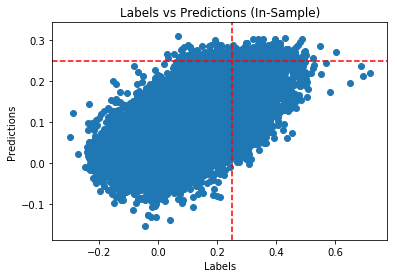

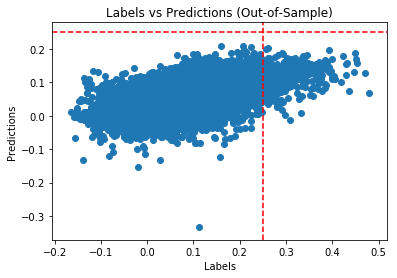

In [4]:
plt.scatter(y_train, y_train_hat_1)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat_1)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [5]:
predictive_df = pd.DataFrame({"label": y_test, "pred": y_test_hat_1})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  nan
Mean return for top 10 predictions:  0.23516155671067543
Mean return for top 25 predictions:  0.2278281044431097


/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Get Coefficients

In [6]:
model = sm.OLS(y_train, X_train)
model = model.fit()

coefficients = model.params
standard_errors = model.HC0_se

regression_table = pd.DataFrame({"coefficients":coefficients, 
                                 "standard_errors":standard_errors,
                                 "t-statistics":coefficients/standard_errors}, index=features)

In [7]:
regression_table

,coefficients,standard_errors,t-statistics
year,-0.601791,0.026380,-22.812181
month,-0.108452,0.004804,-22.574139
90_day_treasury_bill_rate,0.018929,0.002455,7.711115
mean_adjusted_income_lag_log,0.173031,0.011549,14.982283
mean_adjusted_income_with_dep_lag_log,-0.206596,0.011038,-18.716459
mean_fixed_mortgage_rate,-0.026045,0.002268,-11.481347
mean_hourly_earnings_adj,-0.121394,0.029558,-4.106967
mean_mortgage_interest_hh_lag_log,0.057237,0.003354,17.064357
mean_real_estate_taxes_hh_lag_log,-0.062933,0.004159,-15.130480
median_sqft_value_log,0.036557,0.006281,5.820303
